In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# dataset as df
df = pd.read_csv('game_sales_data.csv')

In [3]:
df.head()

Rank                              Name Platform         Publisher  \
0     1                        Wii Sports      Wii          Nintendo   
1     2                 Super Mario Bros.      NES          Nintendo   
2     3  Counter-Strike: Global Offensive       PC             Valve   
3     4                    Mario Kart Wii      Wii          Nintendo   
4     5     PLAYERUNKNOWN'S BATTLEGROUNDS       PC  PUBG Corporation   

           Developer  Critic_Score  User_Score  Total_Shipped  Year  
0       Nintendo EAD           7.7         8.0          82.90  2006  
1       Nintendo EAD          10.0         8.2          40.24  1985  
2  Valve Corporation           8.0         7.5          40.00  2012  
3       Nintendo EAD           8.2         9.1          37.32  2008  
4   PUBG Corporation           8.6         4.7          36.60  2017

In [4]:
df.shape

(19600, 9)

In [5]:
# concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19600 entries, 0 to 19599
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           19600 non-null  int64  
 1   Name           19600 non-null  object 
 2   Platform       19600 non-null  object 
 3   Publisher      19600 non-null  object 
 4   Developer      19598 non-null  object 
 5   Critic_Score   9969 non-null   float64
 6   User_Score     2223 non-null   float64
 7   Total_Shipped  19600 non-null  float64
 8   Year           19600 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 1.3+ MB


In [6]:
# total null values w.r.t columns
df.isna().sum()

Rank                 0
Name                 0
Platform             0
Publisher            0
Developer            2
Critic_Score      9631
User_Score       17377
Total_Shipped        0
Year                 0
dtype: int64

In [7]:
# descriptive statistics of the dataset
df.describe().T

count         mean          std      min      25%      50%  \
Rank           19600.0  9798.539133  5658.110539     1.00  4898.75  9798.50   
Critic_Score    9969.0     7.034848     1.558968     0.80     6.10     7.30   
User_Score      2223.0     6.994872     1.517038     1.00     6.30     7.20   
Total_Shipped  19600.0     0.551123     1.671466     0.01     0.05     0.16   
Year           19600.0  2007.789949     6.326169  1977.00  2004.00  2008.00   

                    75%      max  
Rank           14698.25  19598.0  
Critic_Score       8.20     10.0  
User_Score         8.00     10.0  
Total_Shipped      0.46     82.9  
Year            2012.00   2020.0

# EDA

<P><i><strong>Total platforms and Number of games</strong></i>

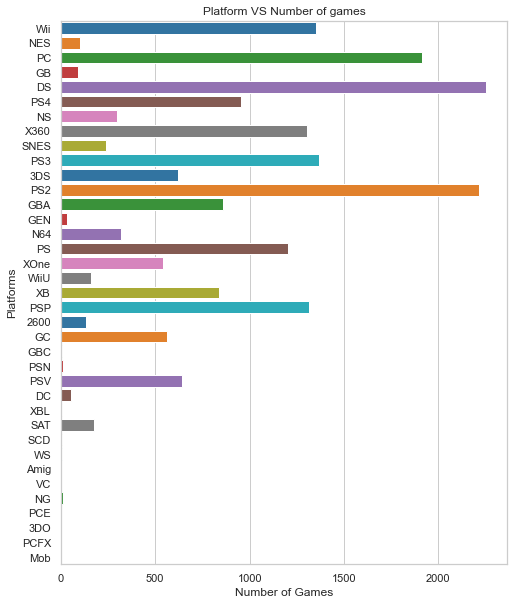

In [8]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (8, 10))
sns.countplot(y = 'Platform', data = df, palette = 'tab10');
plt.xlabel('Number of Games')
plt.ylabel('Platforms')
plt.title('Platform VS Number of games');

In [9]:
desired_platforms = ['PC', 'PS4', 'PS3', 'Xone', 'X360']

# filter out the undesired platforms from the dataset
filtered_df = df[df['Platform'].isin(desired_platforms)]
filtered_df.head()

Rank                              Name Platform               Publisher  \
2      3  Counter-Strike: Global Offensive       PC                   Valve   
4      5     PLAYERUNKNOWN'S BATTLEGROUNDS       PC        PUBG Corporation   
5      6                         Minecraft       PC                  Mojang   
11    12      Call of Duty: Modern Warfare      PS4              Activision   
15    16                Kinect Adventures!     X360  Microsoft Game Studios   

              Developer  Critic_Score  User_Score  Total_Shipped  Year  
2     Valve Corporation           8.0         7.5          40.00  2012  
4      PUBG Corporation           8.6         4.7          36.60  2017  
5             Mojang AB          10.0         7.8          33.15  2010  
11        Infinity Ward           8.0         3.3          30.13  2019  
15  Good Science Studio           6.7         NaN          24.00  2010

In [10]:
filtered_df.shape

(5536, 9)

In [11]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5536 entries, 2 to 19596
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           5536 non-null   int64  
 1   Name           5536 non-null   object 
 2   Platform       5536 non-null   object 
 3   Publisher      5536 non-null   object 
 4   Developer      5536 non-null   object 
 5   Critic_Score   3260 non-null   float64
 6   User_Score     1233 non-null   float64
 7   Total_Shipped  5536 non-null   float64
 8   Year           5536 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 432.5+ KB


<b>Number of distinct games in each platforms</b>

In [12]:
filtered_df.Platform.value_counts()

PC      1913
PS3     1368
X360    1302
PS4      953
Name: Platform, dtype: int64

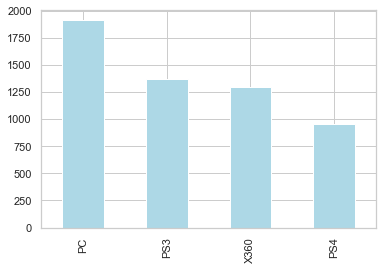

In [13]:
filtered_df.Platform.value_counts().plot(kind = 'bar', color = 'lightblue');

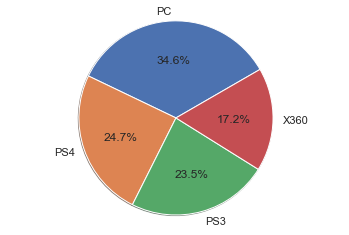

In [14]:
labels = 'PC', 'PS4', 'PS3', 'X360'
explode = (0, 0.0, 0.0, 0.0)

fig, ax = plt.subplots()
ax.pie(filtered_df.Platform.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=30, radius=3)
ax.axis('equal')
plt.show()

In [15]:
# sliced dataframe where only 'Unknown' Publisher exist
filtered_df[filtered_df.Publisher == 'Unknown']

Rank                                               Name Platform  \
52        53                                           Terraria       PC   
602      601                                     Super Meat Boy       PC   
660      659                      Infestation: Survivor Stories       PC   
953      952                                   How to Survive 2       PC   
1042    1041                              Stick Fight: The Game       PC   
...      ...                                                ...      ...   
18459  18458                   Dark Parables: The Exiled Prince       PC   
18835  18834  The Treasures of Mystery Island 3 Pack - Save ...       PC   
19218  19217                  PDC World Championship Darts 2008       PC   
19223  19222                                The Tiny Bang Story       PC   
19449  19448                                       Euro Fishing       PC   

      Publisher                Developer  Critic_Score  User_Score  \
52      Unknown                 Re-Logic           8.8         8.6   
602     Unknown                Team Meat           9.2         NaN   
660     Unknown  Hammerpoint Interactive           3.0         NaN   
953     Unknown             EKO Software           NaN         NaN   
1042    Unknown            Landfall West           NaN         NaN   
...         ...                      ...           ...         ...   
18459   Unknown           Blue Tea Games           NaN         NaN   
18835   Unknown               Viva Media           NaN         NaN   
19218   Unknown             Mere Mortals           NaN         NaN   
19223   Unknown            Colibri Games           6.3         7.2   
19449   Unknown           Dovetail Games           NaN         NaN   

       Total_Shipped  Year  
52             14.00  2011  
602             2.97  2010  
660             2.80  2012  
953             2.15  2016  
1042            2.01  2017  
...              ...   ...  
18459           0.01  2011  
18835           0.01  2011  
19218           0.01  2008  
19223           0.01  2011  
19449           0.01  2015  

[88 rows x 9 columns]

In [16]:
print('There are {}  games with unknown publishers'.format(len(filtered_df[filtered_df.Publisher == 'Unknown'])))

There are 88  games with unknown publishers


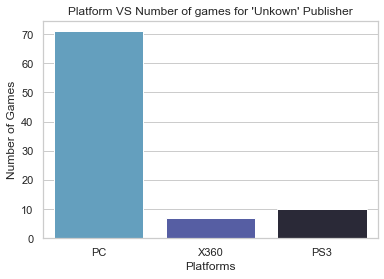

In [17]:
sns.set_theme(style="whitegrid", palette="icefire")
sns.countplot(x = 'Platform', data = filtered_df[filtered_df.Publisher == 'Unknown']);
plt.ylabel('Number of Games')
plt.xlabel('Platforms')
plt.title("Platform VS Number of games for 'Unkown' Publisher");

In [18]:
filtered_df[filtered_df.Publisher == 'Unknown'].isna().sum()

Rank              0
Name              0
Platform          0
Publisher         0
Developer         0
Critic_Score     56
User_Score       66
Total_Shipped     0
Year              0
dtype: int64

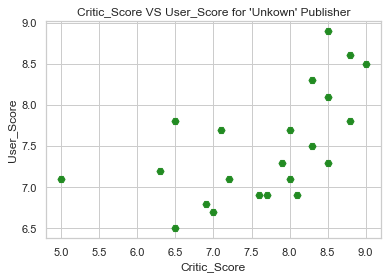

In [19]:
plt.scatter(filtered_df[filtered_df.Publisher == 'Unknown'].Critic_Score, filtered_df[filtered_df.Publisher == 'Unknown'].User_Score, color = 'forestgreen', marker = 'H', s= 50)
plt.xlabel('Critic_Score')
plt.ylabel('User_Score')
plt.title("Critic_Score VS User_Score for 'Unkown' Publisher");

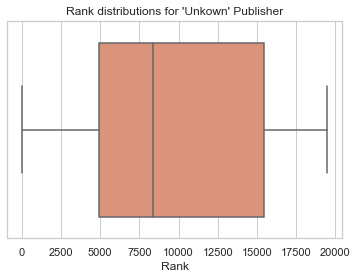

In [20]:
sns.set_theme(style="whitegrid", palette="flare")
sns.boxplot(x = 'Rank', data = filtered_df[filtered_df.Publisher == 'Unknown'])
plt.title("Rank distributions for 'Unkown' Publisher");

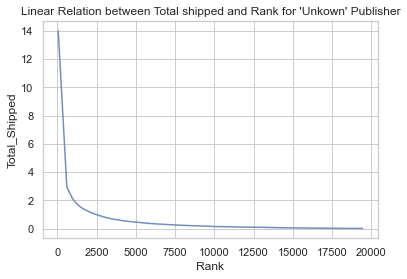

In [21]:
sns.set_theme(style="whitegrid", palette="vlag")
sns.lineplot(x = 'Rank', y = 'Total_Shipped', data = filtered_df[filtered_df.Publisher == 'Unknown'])
plt.title("Linear Relation between Total shipped and Rank for 'Unkown' Publisher");

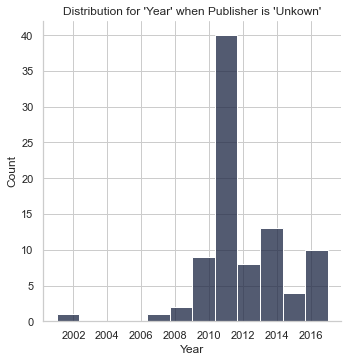

In [22]:
sns.set_theme(style="whitegrid", palette="cubehelix")
sns.displot(x = 'Year', data = filtered_df[filtered_df.Publisher == 'Unknown'])
plt.title("Distribution for 'Year' when Publisher is 'Unkown'");

In [23]:
filtered_df.head()

Rank                              Name Platform               Publisher  \
2      3  Counter-Strike: Global Offensive       PC                   Valve   
4      5     PLAYERUNKNOWN'S BATTLEGROUNDS       PC        PUBG Corporation   
5      6                         Minecraft       PC                  Mojang   
11    12      Call of Duty: Modern Warfare      PS4              Activision   
15    16                Kinect Adventures!     X360  Microsoft Game Studios   

              Developer  Critic_Score  User_Score  Total_Shipped  Year  
2     Valve Corporation           8.0         7.5          40.00  2012  
4      PUBG Corporation           8.6         4.7          36.60  2017  
5             Mojang AB          10.0         7.8          33.15  2010  
11        Infinity Ward           8.0         3.3          30.13  2019  
15  Good Science Studio           6.7         NaN          24.00  2010

In [24]:
filtered_df1 = filtered_df.drop(['Rank', 'Name', 'Platform', 'Publisher', 'User_Score', 'Total_Shipped', 'Year'], axis = 1)

In [25]:
filtered_df1.head()

Developer  Critic_Score
2     Valve Corporation           8.0
4      PUBG Corporation           8.6
5             Mojang AB          10.0
11        Infinity Ward           8.0
15  Good Science Studio           6.7

In [26]:
# dropping null values for easy calculation
filtered_df1.dropna(inplace = True)
filtered_df1.head()

Developer  Critic_Score
2     Valve Corporation           8.0
4      PUBG Corporation           8.6
5             Mojang AB          10.0
11        Infinity Ward           8.0
15  Good Science Studio           6.7

In [27]:
avg_cs = filtered_df1.groupby('Developer', as_index=False, sort = False)['Critic_Score'].mean()
avg_cs.head()

Developer  Critic_Score
0    Valve Corporation         8.550
1     PUBG Corporation         7.900
2            Mojang AB        10.000
3        Infinity Ward         8.335
4  Good Science Studio         6.700

In [28]:
# Restore the `.rcParams` from the original rc file loaded by Matplotlib.
mpl.rc_file_defaults()

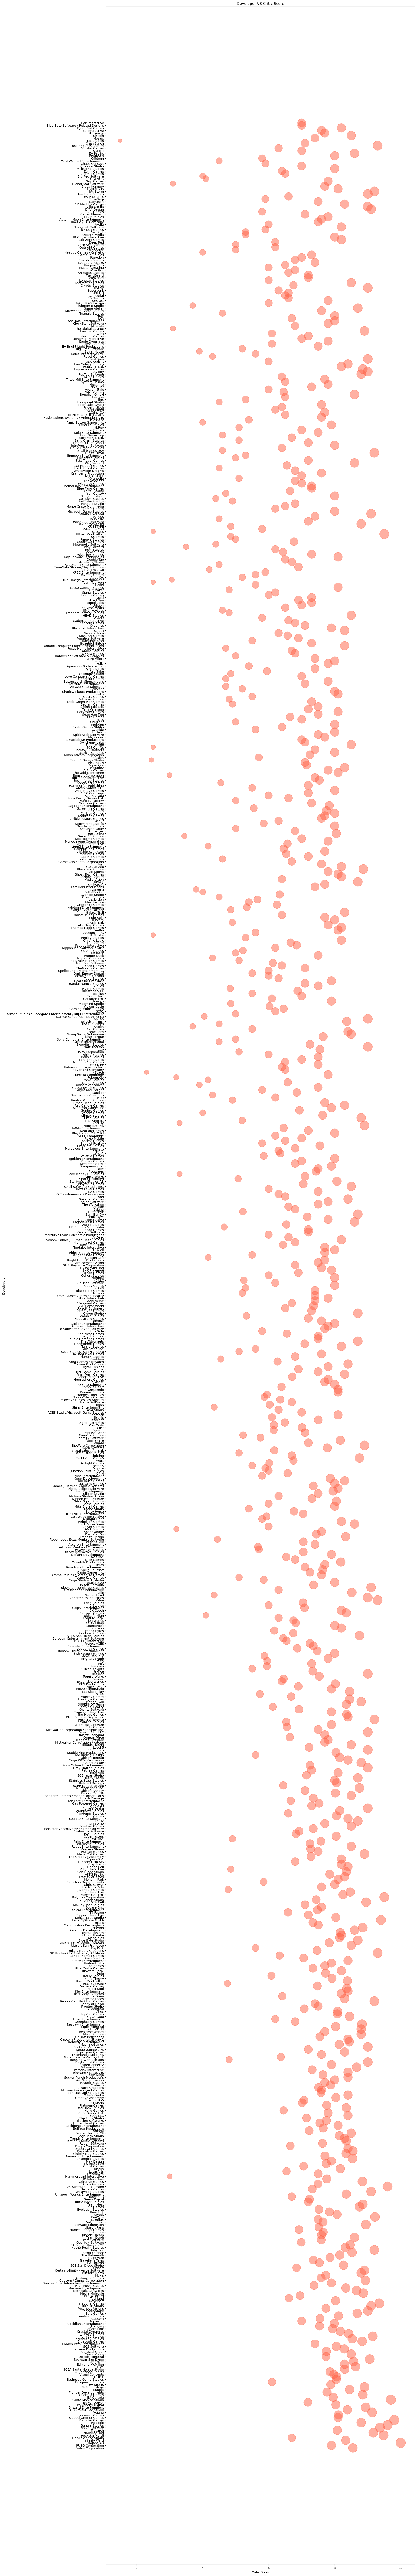

In [29]:
plt.figure(figsize=(18, 150))
plt.scatter(x = avg_cs.Critic_Score, y = avg_cs.Developer, s = [100*n for n in (avg_cs.Critic_Score)], color = 'tomato', alpha = .50)
plt.xlabel('Critic Score')
plt.ylabel('Developers')
plt.title("Developer VS Critic Score");

In [30]:
filtered_df.head()

Rank                              Name Platform               Publisher  \
2      3  Counter-Strike: Global Offensive       PC                   Valve   
4      5     PLAYERUNKNOWN'S BATTLEGROUNDS       PC        PUBG Corporation   
5      6                         Minecraft       PC                  Mojang   
11    12      Call of Duty: Modern Warfare      PS4              Activision   
15    16                Kinect Adventures!     X360  Microsoft Game Studios   

              Developer  Critic_Score  User_Score  Total_Shipped  Year  
2     Valve Corporation           8.0         7.5          40.00  2012  
4      PUBG Corporation           8.6         4.7          36.60  2017  
5             Mojang AB          10.0         7.8          33.15  2010  
11        Infinity Ward           8.0         3.3          30.13  2019  
15  Good Science Studio           6.7         NaN          24.00  2010

In [31]:
filtered_df2 = filtered_df.dropna()
filtered_df2['Rate_Diff'] = np.abs(filtered_df2['Critic_Score'] - filtered_df2['User_Score'])

<b>Top 5 games with biggest differences in critic vs user score</b>

In [32]:
filtered_df2.sort_values('Rate_Diff', ascending = False).Name[:5]

157                  FIFA 20
3506    Call of Duty: Ghosts
116                  FIFA 19
135                 NBA 2K20
506                 NBA 2K18
Name: Name, dtype: object

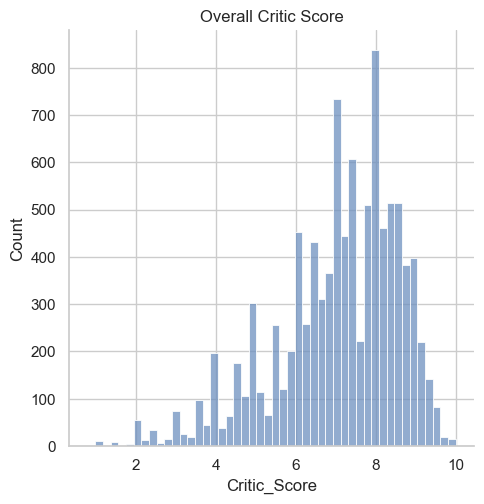

In [34]:
sns.set_theme(style="whitegrid", palette="vlag")
sns.displot(x = 'Critic_Score', data = df)
plt.title("Overall Critic Score");

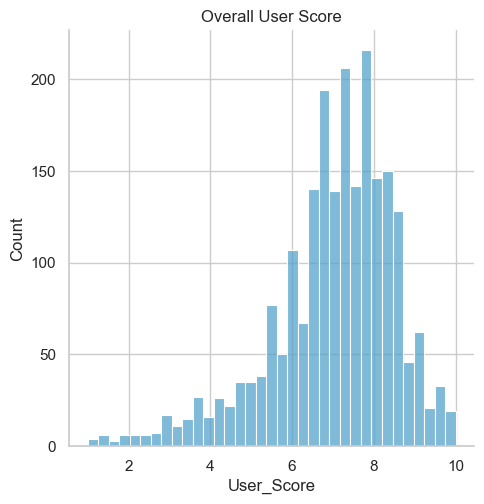

In [35]:
sns.set_theme(style="whitegrid", palette="icefire")
sns.displot(x = 'User_Score', data = df)
plt.title("Overall User Score");

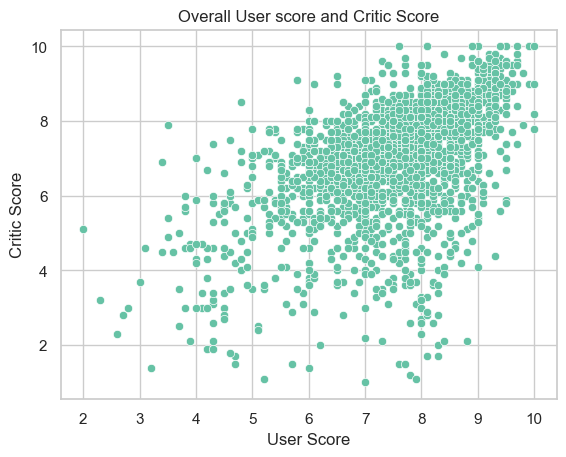

In [36]:
sns.set_theme(style="whitegrid", palette="Set2")
sns.scatterplot(x = df.Critic_Score, y = df.User_Score)
plt.xlabel('User Score')
plt.ylabel('Critic Score')
plt.title('Overall User score and Critic Score');

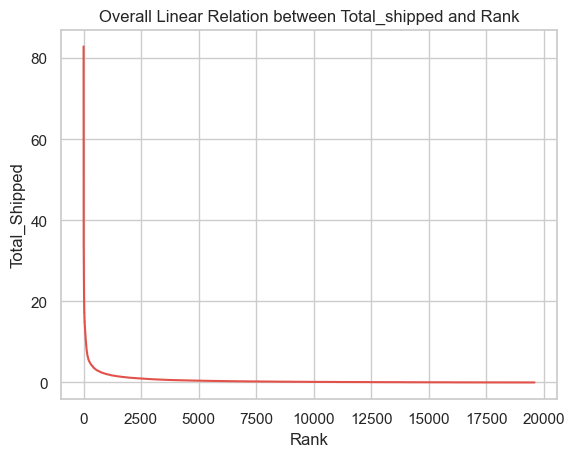

In [37]:
sns.set_theme(style="whitegrid", palette="Spectral")
sns.lineplot(x = 'Rank', y = 'Total_Shipped', data =df)
plt.title('Overall Linear Relation between Total_shipped and Rank');

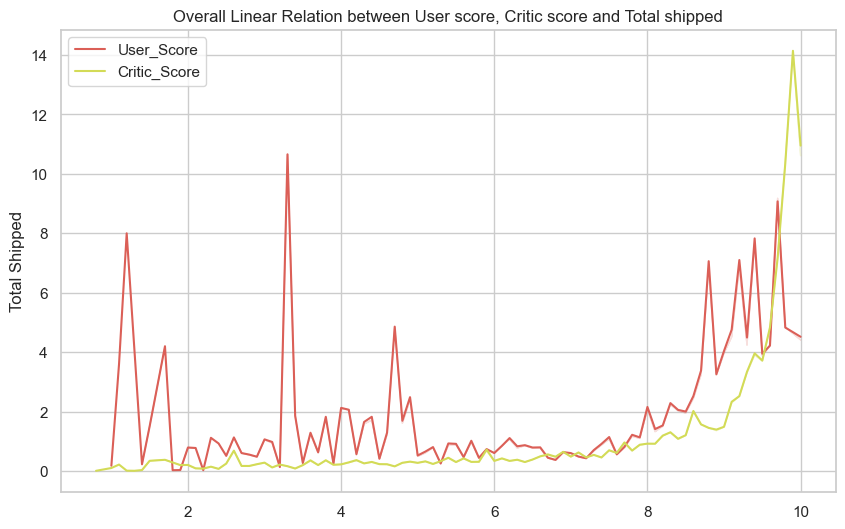

In [38]:
sns.set_theme(style="whitegrid", palette="hls")
plt.figure(figsize = (10, 6))
sns.lineplot(x = 'User_Score', y = 'Total_Shipped', data =df, ci=0);
sns.lineplot(x = 'Critic_Score', y = 'Total_Shipped', data =df, ci=0)
plt.legend(['User_Score', 'Critic_Score'])
plt.xlabel('')
plt.ylabel('Total Shipped')
plt.title('Overall Linear Relation between User score, Critic score and Total shipped');

<b> Top Game Developers within 100 Rank </b>

In [39]:
df[df.Rank <= 100].Developer.value_counts()

Nintendo EAD                    17
Game Freak                      13
Rockstar North                   8
Infinity Ward                    7
Treyarch                         5
Nintendo EPD                     4
Polyphony Digital                4
Nintendo R&D1                    3
Valve Software                   3
Blizzard Entertainment           3
Nintendo EAD Tokyo               2
CD Projekt Red Studio            2
Nintendo                         2
Nintendo SDD                     2
Naughty Dog                      2
Nd Cube Co., Ltd.                1
Rockstar Games                   1
Re-Logic                         1
Insomniac Games                  1
Good Science Studio              1
Bandai Namco Games               1
EA Vancouver                     1
Bungie Studios                   1
Project Sora                     1
EA Canada                        1
Sonic Team                       1
Ubisoft Paris                    1
Nintendo EAD / Retro Studios     1
Sledgehammer Games  

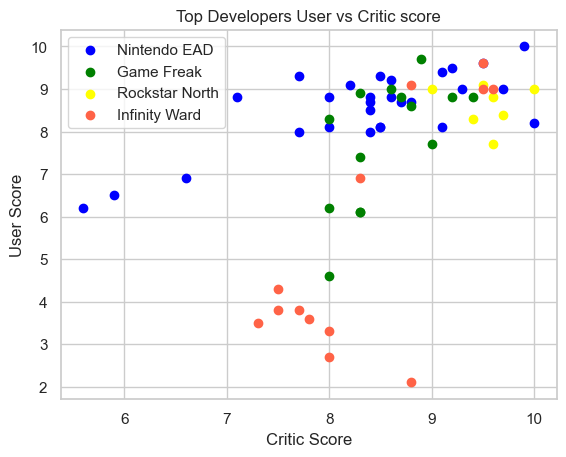

In [40]:
plt.scatter(df[df.Developer == 'Nintendo EAD'].Critic_Score, df[df.Developer == 'Nintendo EAD'].User_Score, color = 'blue');
plt.scatter(df[df.Developer == 'Game Freak'].Critic_Score, df[df.Developer == 'Game Freak'].User_Score, color = 'green');
plt.scatter(df[df.Developer == 'Rockstar North'].Critic_Score, df[df.Developer == 'Rockstar North'].User_Score, color = 'yellow');
plt.scatter(df[df.Developer == 'Infinity Ward'].Critic_Score, df[df.Developer == 'Infinity Ward'].User_Score, color = 'tomato');
plt.legend(['Nintendo EAD', 'Game Freak', 'Rockstar North', 'Infinity Ward'])
plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.title('Top Developers User vs Critic score');

<b>Platforms for Top 100 Games</b>

In [41]:
df[df.Rank <= 100].Platform.value_counts()

PC      13
PS4     12
Wii     10
DS      10
X360    10
NS       9
PS3      8
3DS      7
GB       6
PS2      5
NES      3
SNES     2
GBA      2
PS       1
N64      1
GEN      1
Name: Platform, dtype: int64

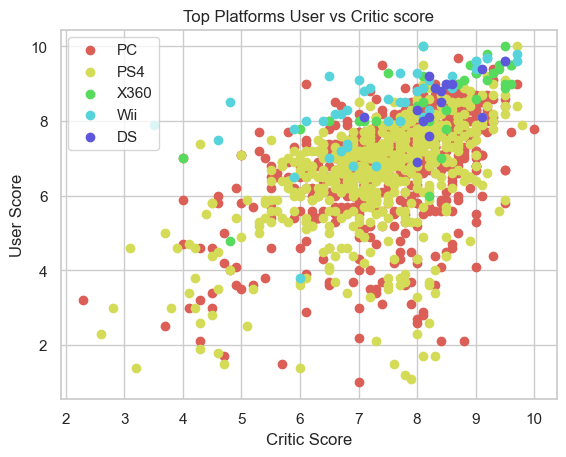

In [42]:
plt.scatter(df[df.Platform == 'PC'].Critic_Score, df[df.Platform == 'PC'].User_Score);
plt.scatter(df[df.Platform == 'PS4'].Critic_Score, df[df.Platform == 'PS4'].User_Score);
plt.scatter(df[df.Platform == 'X360'].Critic_Score, df[df.Platform == 'X360'].User_Score);
plt.scatter(df[df.Platform == 'Wii'].Critic_Score, df[df.Platform == 'Wii'].User_Score);
plt.scatter(df[df.Platform == 'DS'].Critic_Score, df[df.Platform == 'DS'].User_Score);
plt.legend(['PC', 'PS4', 'X360', 'Wii', 'DS'])
plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.title('Top Platforms User vs Critic score');

# Top 10 Games Details

<b> Publishers of Top 10 Games</b>

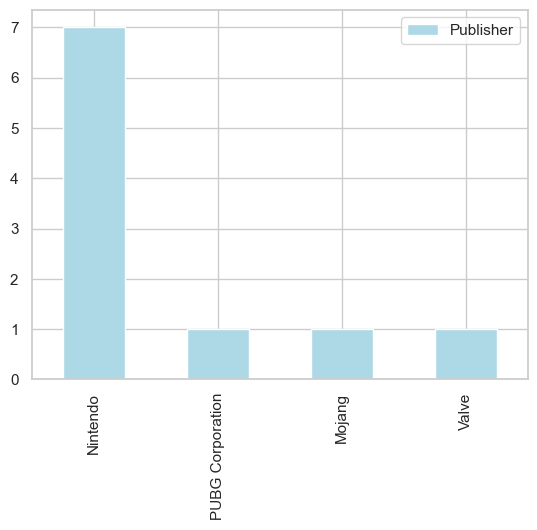

In [43]:
pd.DataFrame(df[df.Rank <= 10].Publisher.value_counts()).plot(kind = 'bar', color = 'lightblue');

<b>Developers of Top 10 Games</b>

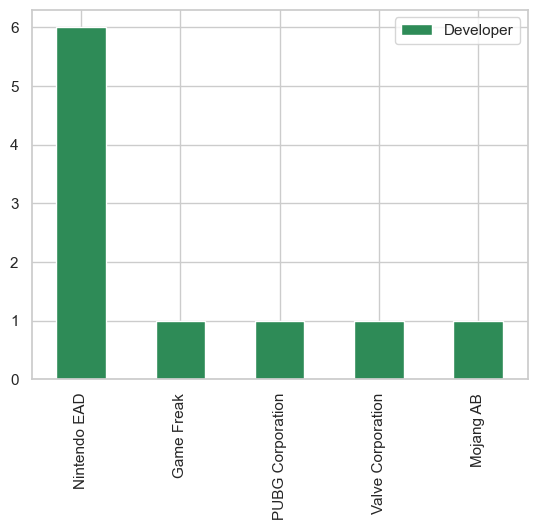

In [44]:
pd.DataFrame(df[df.Rank <= 10].Developer.value_counts()).plot(kind = 'bar', color = 'seagreen');

<b> Platforms of Top 10 Games</b>

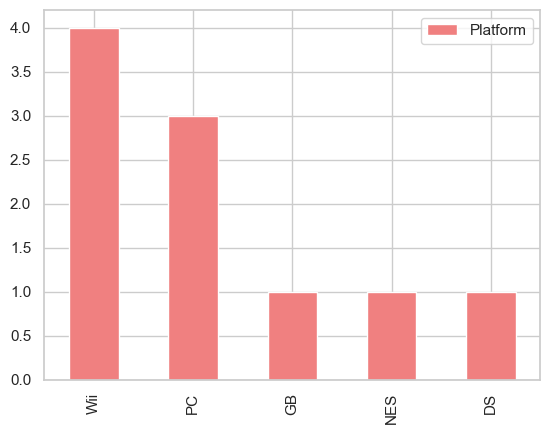

In [45]:
pd.DataFrame(df[df.Rank <= 10].Platform.value_counts()).plot(kind = 'bar', color = 'lightcoral');

<b> User vs Critic Score of Top 10 games</b>

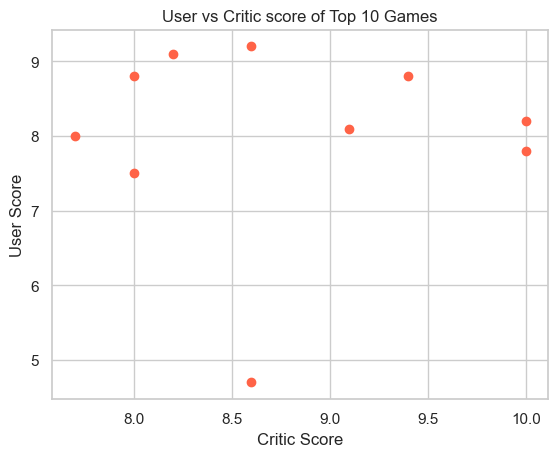

In [46]:
plt.scatter(df[df.Rank <= 10].Critic_Score, df[df.Rank <= 10].User_Score, color = 'tomato')
plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.title('User vs Critic score of Top 10 Games');

<b> Release Years of Top 10 Games</b>

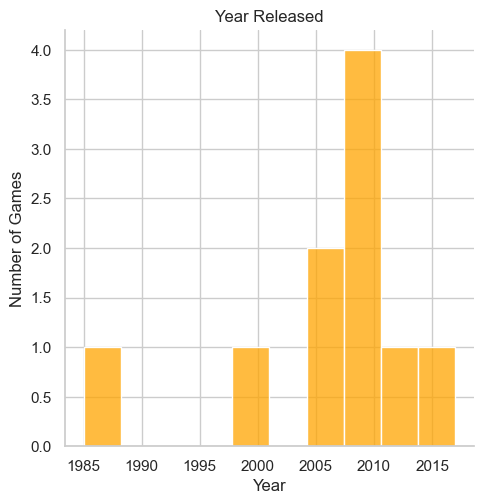

In [47]:
sns.displot(x = 'Year', data = df[df.Rank <= 10], color = 'orange')
plt.ylabel('Number of Games')
plt.title('Year Released');